In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.plotting import scatter_matrix

In [6]:
#csv파일 읽어오기
df = pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


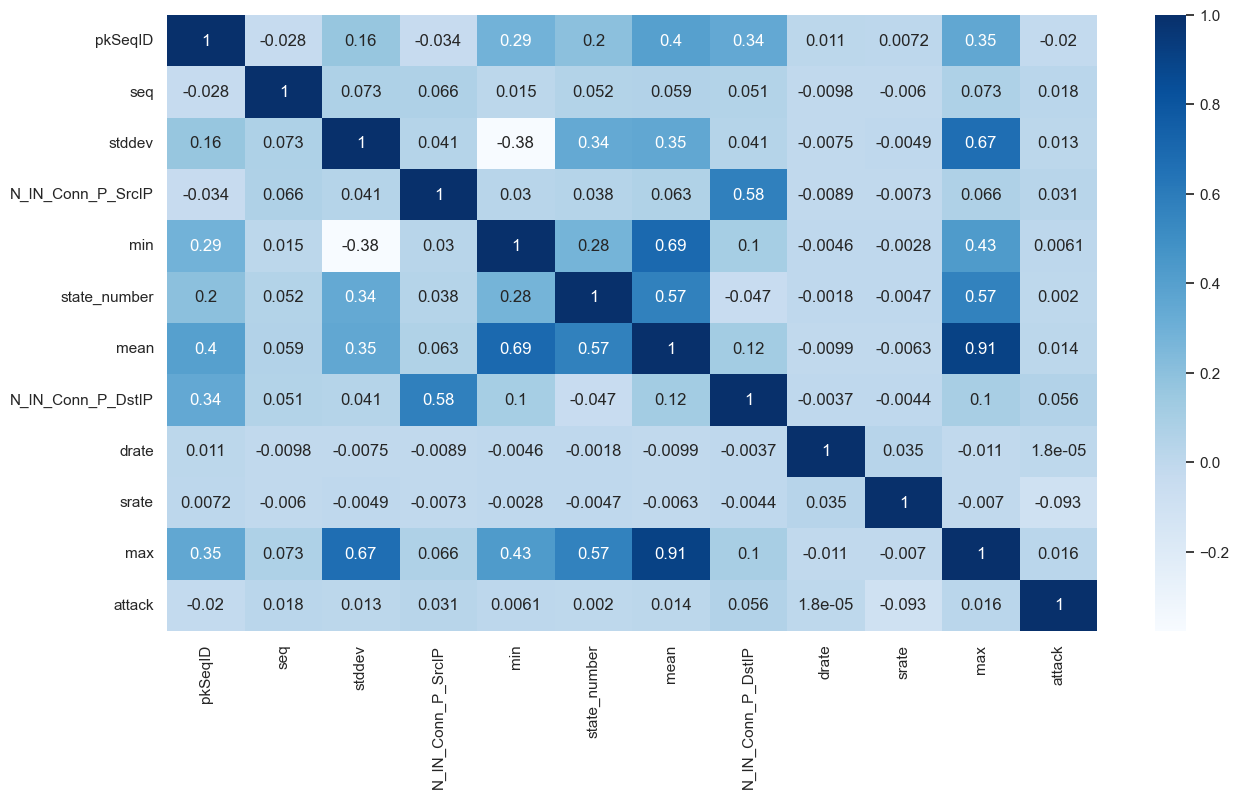

In [7]:
#corr 각 열의 상관계수를 반환하는 메소드
#corr 함수 자체가 상관계수를 반환하는 거라 관계의 정도를 수량화 한 거기 때문에 논문에서 선택한 특성이 행 식별자/attack 제외한 10개
cor = df.corr()

#heatmap size
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [8]:
#column 에서 attack과 관련된 
cor["attack"].sort_values(ascending=False)

attack               1.000000
N_IN_Conn_P_DstIP    0.055616
N_IN_Conn_P_SrcIP    0.030598
seq                  0.017947
max                  0.015957
mean                 0.013647
stddev               0.012640
min                  0.006102
state_number         0.002041
drate                0.000018
pkSeqID             -0.019877
srate               -0.093351
Name: attack, dtype: float64

array([[<AxesSubplot:xlabel='seq', ylabel='seq'>,
        <AxesSubplot:xlabel='stddev', ylabel='seq'>,
        <AxesSubplot:xlabel='N_IN_Conn_P_SrcIP', ylabel='seq'>,
        <AxesSubplot:xlabel='min', ylabel='seq'>,
        <AxesSubplot:xlabel='state_number', ylabel='seq'>,
        <AxesSubplot:xlabel='mean', ylabel='seq'>,
        <AxesSubplot:xlabel='N_IN_Conn_P_DstIP', ylabel='seq'>,
        <AxesSubplot:xlabel='drate', ylabel='seq'>,
        <AxesSubplot:xlabel='srate', ylabel='seq'>,
        <AxesSubplot:xlabel='max', ylabel='seq'>],
       [<AxesSubplot:xlabel='seq', ylabel='stddev'>,
        <AxesSubplot:xlabel='stddev', ylabel='stddev'>,
        <AxesSubplot:xlabel='N_IN_Conn_P_SrcIP', ylabel='stddev'>,
        <AxesSubplot:xlabel='min', ylabel='stddev'>,
        <AxesSubplot:xlabel='state_number', ylabel='stddev'>,
        <AxesSubplot:xlabel='mean', ylabel='stddev'>,
        <AxesSubplot:xlabel='N_IN_Conn_P_DstIP', ylabel='stddev'>,
        <AxesSubplot:xlabel='drate', ylabe

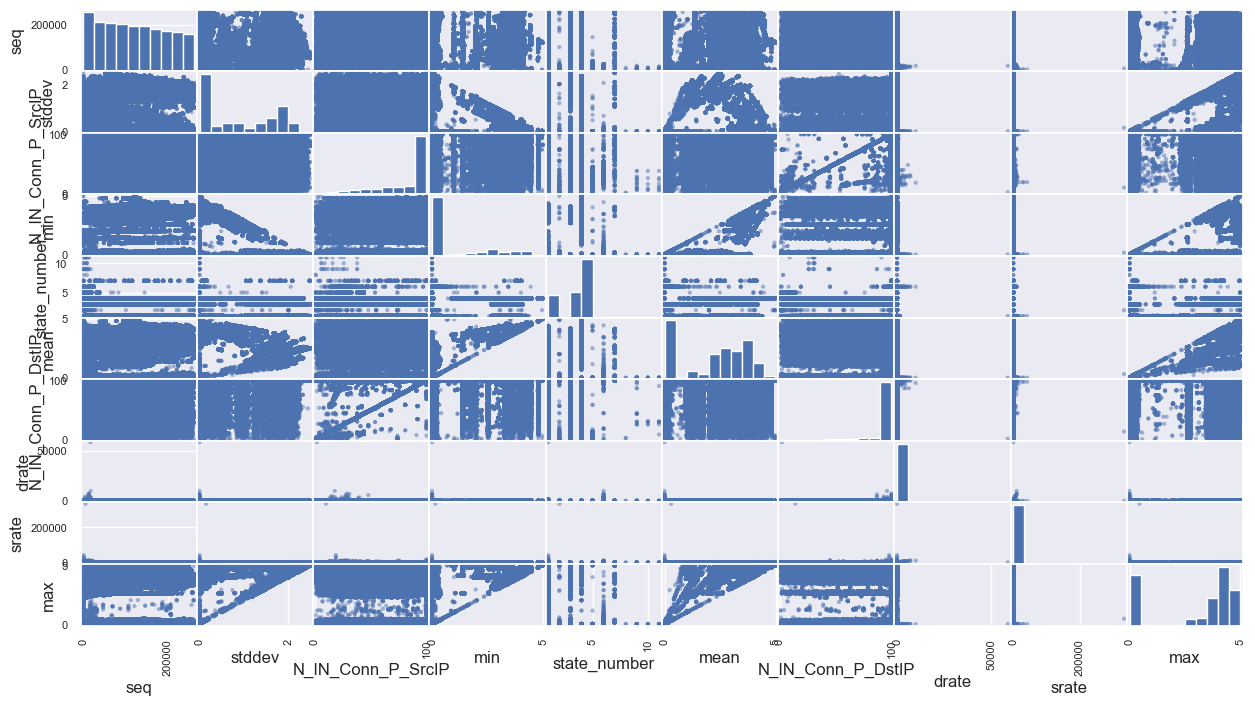

In [9]:
#scatter_matrix 산점도 행렬도 특성을 x,y 축에 놓아, 두 특성의 관계를 하나의 점으로 나타내는 거라서 두 개 그래프 보여주면서 관계 있는 column으로 특성 10가지 선택했다고 하면 될 것 같아요.
attributes = ['seq', 'stddev', 'N_IN_Conn_P_SrcIP', 'min','state_number',
              'mean', 'N_IN_Conn_P_DstIP', 'drate','srate', 'max']
scatter_matrix(df[attributes], figsize=(15, 8))     